<a href="https://colab.research.google.com/github/amankc/Fall24---Modeling/blob/main/assignment05/mod05_1D_Advection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import matplotlib.pyplot as plt

dx = 5.0  # Spatial interval [m] - DON'T CHANGE
dt =   16   # Time step [yr]

# Fraction of initial tank volume lost each year [yr-1]
k_tank = 0.0005

xmin = 0.0 # Origin: Contamination site
xmax = 4000.0 # Edge of the domain

t0 = 0.0 # Time that the tank broke
tf = 10000.0 # End of simulation time

Ks = 15.0 # Saturated hydraylic conductivity [cm/day]
dhdx = 30.0 # Regional piezometric gradient [ft/mi]

Ks = Ks/100.0*365.25 # Converting Ks from [cm/day] to [m/yr]
dhdx = dhdx*(1/5280.0)

In [62]:
q = Ks*dhdx

print('The Darcy velocity is ' + '{:.3f}'.format(q) + ' [m/yr]')

The Darcy velocity is 0.311 [m/yr]


In [63]:
x = np.arange(xmin+dx/2, xmax, dx)
Nx = x.size

print('The number of cells is: Nx = ' + str(Nx))

The number of cells is: Nx = 800


In [55]:
t = np.arange(t0,tf+dt,dt)
Nt = t.size
print('The number of time steps: Nt = ' + str(Nt))

The number of time steps: Nt = 619


In [64]:
Courant = q*(dt/dx)

print('The Courant number is ' + '{:.3f}'.format(Courant)+'. The optimal number is 1 to avoid numerical diffusion. Consider changing dt')

The Courant number is 0.996. The optimal number is 1 to avoid numerical diffusion. Consider changing dt


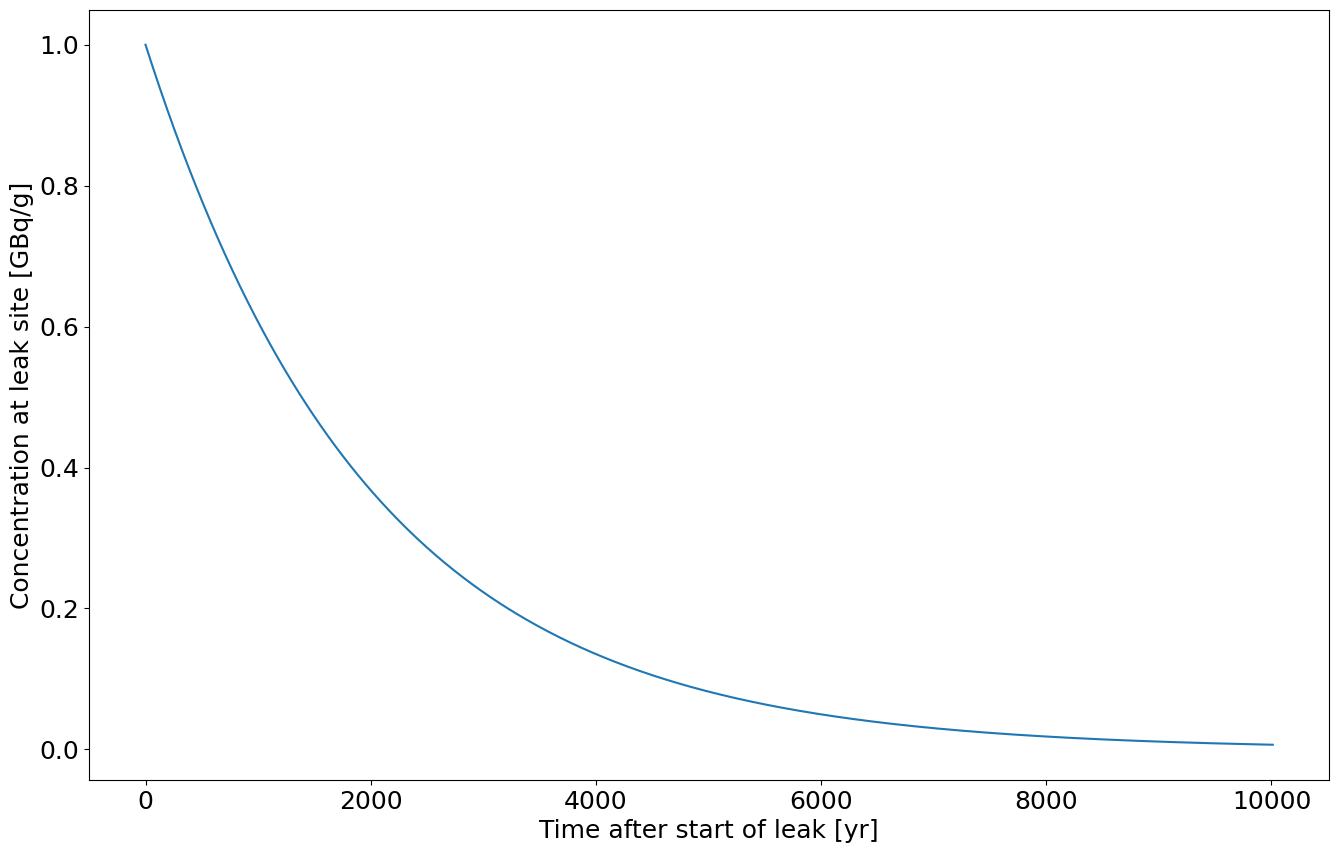

In [65]:
# Initial condition: concentration is 0 GBq/g everywhere except at x = 0,
# where it is 1 Bq/g
c0 = np.zeros((Nx,1))
c0[0] = 1
csource = np.zeros((Nt))

# Boundary condition: concentration decreases at a rate of k_tank [yr-1]
for i in range(len(t)):
  if i == 0:
    csource[i] = 1
  else:
    csource[i] = csource[i-1] * np.exp(-k_tank * (t[i] - t[i-1]))

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 18})
plt.plot(t,csource)
plt.xlabel('Time after start of leak [yr]')
plt.ylabel('Concentration at leak site [GBq/g]')
plt.show()

In [66]:
C = np.zeros((Nx,Nt))
for i in np.arange(Nt):

    # Get initial conditions
    if (i==0):
        Cprev = c0
    else:
        Cprev = C[:,i-1]

    Cnext = np.zeros((Nx))

    for j in np.arange(Nx):

        if (j==0):
            Cnext[0] = csource[i]
        else:
            Cnext[j] = Cprev[j] + q*(dt/dx)*(Cprev[j-1] - Cprev[j])

    C[:,i] = Cnext

<ipython-input-66-20bb88a70bf2>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Cnext[j] = Cprev[j] + q*(dt/dx)*(Cprev[j-1] - Cprev[j])


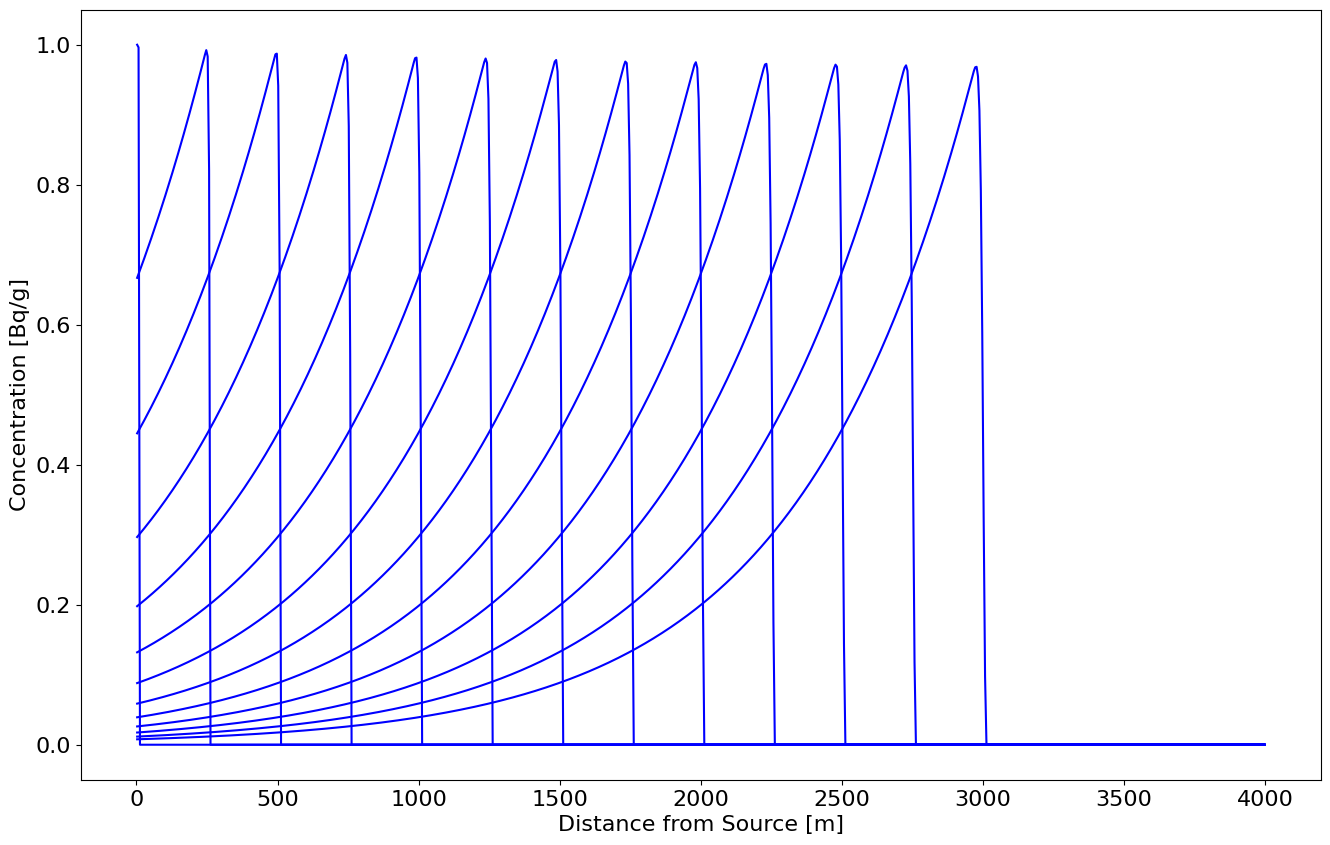

In [67]:
## First off, let's change the font size for all of our plots to be more legible
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))

for p in np.arange(0,Nt,50):
    plt.plot(x,C[:,p],'b')

plt.ylabel('Concentration [Bq/g]')
plt.xlabel('Distance from Source [m]')
plt.show()

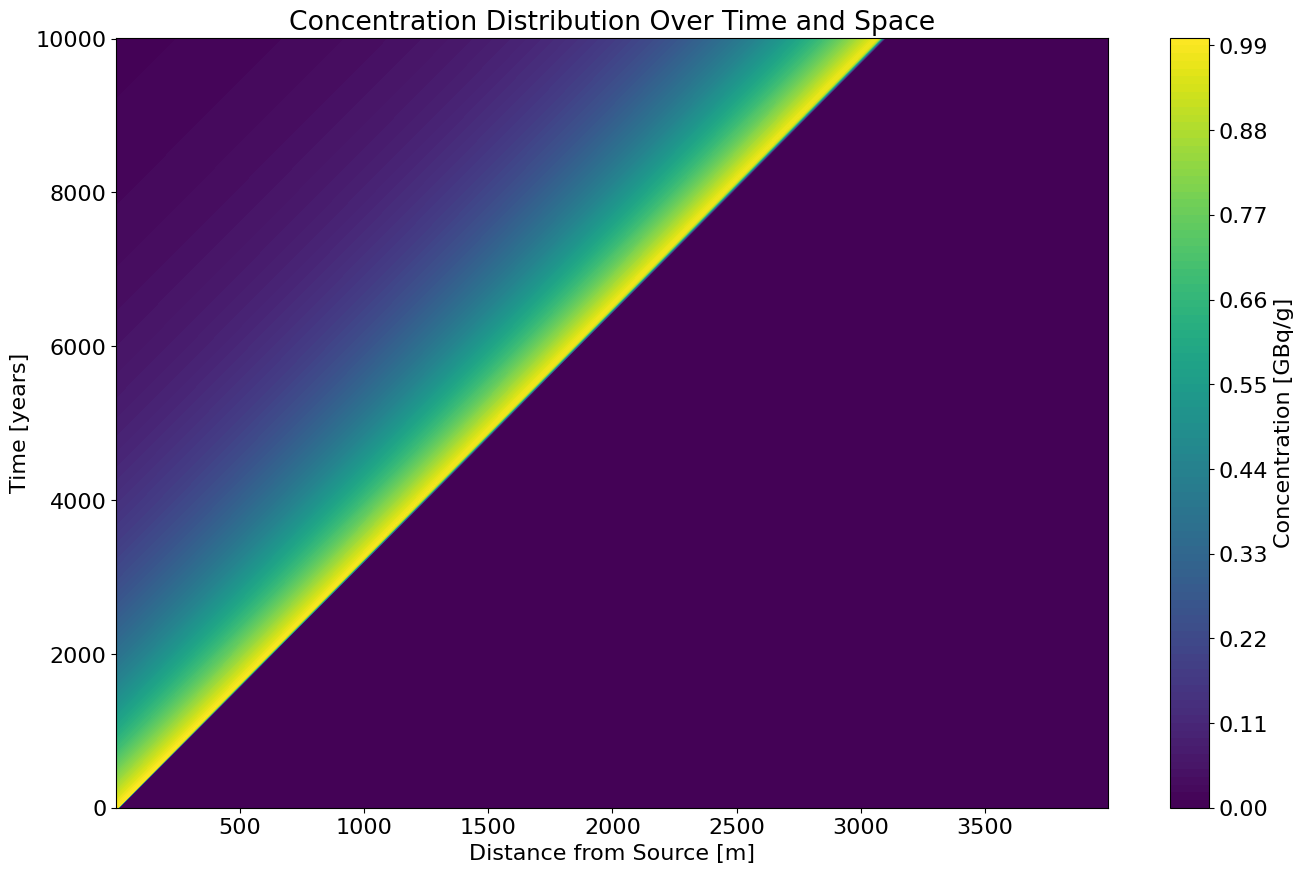

In [68]:
xx,tt = np.meshgrid(t,x)

plt.figure(figsize=(16,10))

plt.contourf(tt, xx, C, levels=100)  # Filled contours with 100 levels
plt.colorbar(label='Concentration [GBq/g]')
plt.title('Concentration Distribution Over Time and Space')



plt.xlabel('Distance from Source [m]')
plt.ylabel('Time [years]')
plt.show()

1. What time step did you have to select to get the Courant number as close to 1.0 as possible?
Response: 16 years

2. If you were to have to describe what was going to happen to the water quality at the town located 1.5 km from the contamination site, how would you describe in words how the water quality will behave in the future?
Response: The water quality at the town located 1.5 km from the contamination source will degrade as the contamination plume arrives. Initially, the concentration will rise gradually as the leading edge of the plume reaches the location, followed by a peak in concentration. Over time, the concentration will decrease.

3. If concentrations below 0.05 GBq/g are considered safe for drinking water quallity, at the town 1.5 km away from the contamination site, how many years in the future will it take the contamination plume to arrive? And how long will the water be unusable?
Response: Using Darcy's velocity, it will take approximately 4823 years for the contamination to reach the town. Duration of unsafe water will be for 5120 years.